# OSMnx features demo

Author: [Geoff Boeing](https://geoffboeing.com/)

Get street networks and other spatial data anywhere in the world from OpenStreetMap then analyze and visualize them.

More info:

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [Documentation and install instructions](https://osmnx.readthedocs.io)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Journal article and citation info](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)

In [1]:
import sys

In [2]:
print(sys.prefix)

/Users/aarongatdula/.conda/envs/maps


In [3]:
import networkx as nx

In [4]:
import requests

In [5]:
import matplotlib.cm as cm

In [6]:
import matplotlib.colors as colors

In [7]:
import pandas as pd

In [2]:
#Marta's suggested code 
conda install -c ioos rtree=0.8.2

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - rtree=0.8.2 -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
ch

In [8]:
import osmnx as ox

In [1]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.11.4'

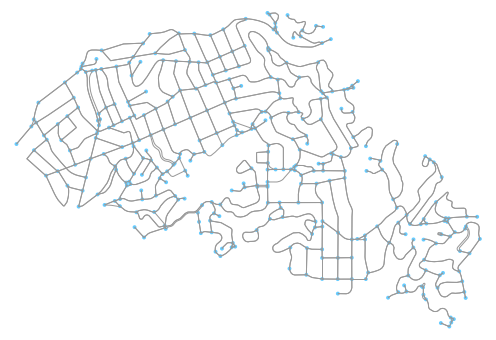

In [10]:
# get a graph for some city
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

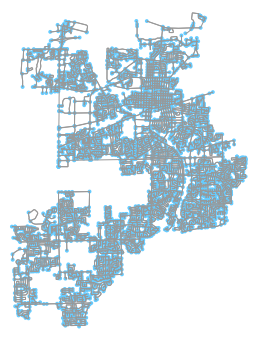

In [26]:
H = ox.graph_from_place('Naperville, Illinois, USA', network_type='drive')
fig, ax = ox.plot_graph(H)

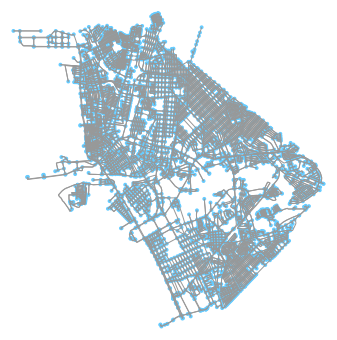

In [15]:
G1 = ox.graph_from_place('Manila, Philippines', network_type='drive')
fig, ax = ox.plot_graph(G1)

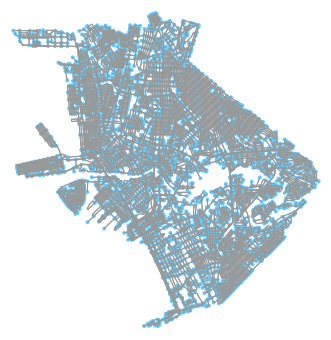

In [3]:
G2 = ox.graph_from_place('Manila, Philippines', network_type='walk')
fig, ax = ox.plot_graph(G2)

In [11]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

4224782.349449131

In [19]:
G1_proj = ox.project_graph(G1)
nodes_proj = ox.graph_to_gdfs(G1_proj, edges = False)
graph_area_m1 = nodes_proj.unary_union.convex_hull.area
graph_area_m1
graph_area_m1 / graph_area_m

12.770524252338726

In [14]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 346,
 'm': 937,
 'k_avg': 5.416184971098266,
 'intersection_count': 312,
 'streets_per_node_avg': 2.953757225433526,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 263, 4: 47, 5: 1, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.09826589595375723,
  2: 0.0,
  3: 0.7601156069364162,
  4: 0.13583815028901733,
  5: 0.002890173410404624,
  6: 0.002890173410404624},
 'edge_length_total': 113833.46199999985,
 'edge_length_avg': 121.4871526147277,
 'street_length_total': 59419.780000000035,
 'street_length_avg': 121.26485714285721,
 'street_segments_count': 490,
 'node_density_km': 81.89771007851208,
 'intersection_density_km': 73.84995822108604,
 'edge_density_km': 26944.219271992228,
 'street_density_km': 14064.577790083738,
 'circuity_avg': 1.1138089330928729,
 'self_loop_proportion': 0.0064034151547491995,
 'clean_intersection_count': 271,
 'clean_intersection_density_km': 64.1453162753664}

In [20]:
ox.basic_stats(G1_proj, area=graph_area_m1, clean_intersects=True, circuity_dist='euclidean')

{'n': 5438,
 'm': 14804,
 'k_avg': 5.444648767929386,
 'intersection_count': 4925,
 'streets_per_node_avg': 3.1750643618977565,
 'streets_per_node_counts': {0: 0,
  1: 513,
  2: 19,
  3: 2960,
  4: 1901,
  5: 39,
  6: 6},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.09433615299742552,
  2: 0.003493931592497242,
  3: 0.5443177638837808,
  4: 0.3495770503861714,
  5: 0.007171754321441706,
  6: 0.0011033468186833395},
 'edge_length_total': 1273394.75799999,
 'edge_length_avg': 86.01693853012631,
 'street_length_total': 752569.0810000014,
 'street_length_avg': 87.7733940984373,
 'street_segments_count': 8574,
 'node_density_km': 100.7920171941538,
 'intersection_density_km': 91.28368603920696,
 'edge_density_km': 23602.06442502396,
 'street_density_km': 13948.686236105308,
 'circuity_avg': 1.0284533405313458,
 'self_loop_proportion': 0.00013509862199405565,
 'clean_intersection_count': 3637,
 'clean_intersection_density_km': 67.41091697961335}

stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats

In [21]:
# see more stats (mostly topological stuff) with extended_stats
more_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True) #use arguments to turn other toplogical analyses on/off
for key in sorted(more_stats.keys()):
    print(key)

avg_neighbor_degree
avg_neighbor_degree_avg
avg_weighted_neighbor_degree
avg_weighted_neighbor_degree_avg
betweenness_centrality
betweenness_centrality_avg
center
closeness_centrality
closeness_centrality_avg
clustering_coefficient
clustering_coefficient_avg
clustering_coefficient_weighted
clustering_coefficient_weighted_avg
degree_centrality
degree_centrality_avg
diameter
eccentricity
pagerank
pagerank_max
pagerank_max_node
pagerank_min
pagerank_min_node
periphery
radius


In [22]:
# pull up some stat's value
more_stats['radius']

2507.4629999999997

In [ ]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='mynetwork_shapefile')
ox.save_graphml(G, filename='mynetwork.graphml')

## Visualize street centrality

In [23]:
# edge closeness centrality: convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

In [ ]:
edge_cent = nx.closeness_centrality(nx.line_graph(G1))

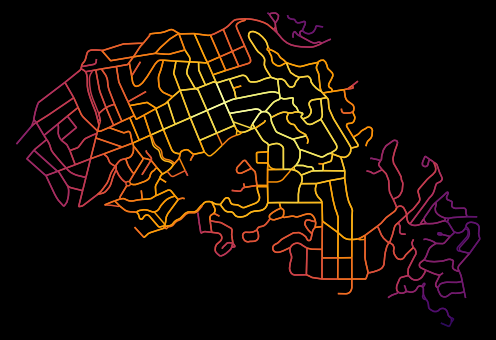

In [24]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

In [ ]:
ev = [edge_cent[edge + (0,)] for edge in G1.edges()]
norm = colors.Normalize(vmin=min(ev)*0.8, vmax = max (ev))
cmap = cm.ScalarMappable(norm=norm, cmap = cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]
fix, ax = ox.plot_graph(G1, bgcolor = 'k', axis_off = True, node_size=0,
                        edge_color=ec, edge_linewidth=0.5, edge_alpha=1)

## Routing

In [28]:
# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (37.828903, -122.245846))
dest_node = ox.get_nearest_node(G, (37.812303, -122.215006))

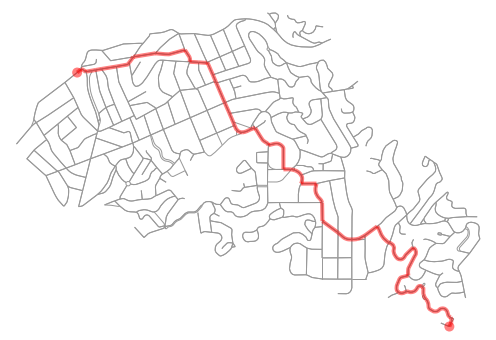

In [29]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [30]:
# how long is our route in meters?
nx.shortest_path_length(G, orig_node, dest_node, weight='length')

4536.362000000001

In [31]:
# how far is it between these two nodes as the crow flies?
ox.great_circle_vec(G.nodes[orig_node]['y'], G.nodes[orig_node]['x'],
                    G.nodes[dest_node]['y'], G.nodes[dest_node]['x'])

3123.7985450057035

## Get networks other ways

make queries less ambiguous to help the geocoder out if it's not finding what you're looking for

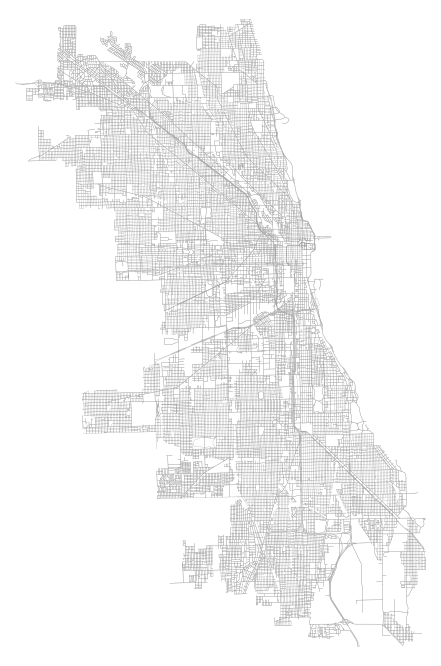

In [34]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
place = {'city' : 'Chicago',
         'state' : 'Illinois',
         'country' : 'USA'}
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.25)

In [40]:
# add elevation to nodes automatically, calculate edge grades, plot network
from keys import google_elevation_api_key
G = ox.add_node_elevations(G, api_key=google_elevation_api_key)
G = ox.add_edge_grades(G)
nc = ox.get_node_colors_by_attr(G, 'elevation', cmap='plasma', num_bins=20)
fig, ax = ox.plot_graph(G, fig_height=6, node_color=nc, node_size=12, node_zorder=2, edge_color='#dddddd')

ModuleNotFoundError: No module named 'keys'

example: create impedance functions to route around hills: https://github.com/gboeing/osmnx-examples/blob/master/notebooks/12-node-elevations-edge-grades.ipynb

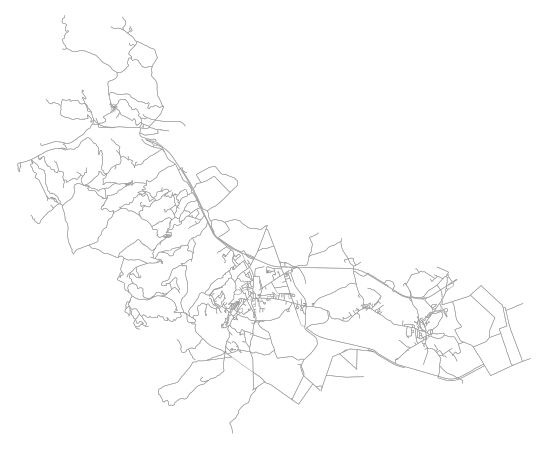

In [36]:
# you can get networks anywhere in the world
G = ox.graph_from_place('Sinalunga, Italy', network_type='all')
fig, ax = ox.plot_graph(G, fig_height=8, node_size=0, edge_linewidth=0.5)

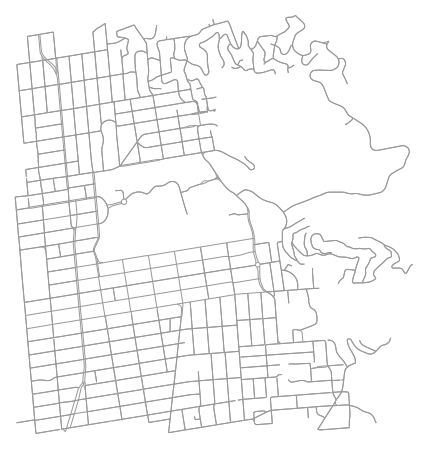

In [37]:
# or get network by coordinates, bounding box, or any custom polygon shape
# useful when OSM just doesn't have a polygon for the place you want
wurster_hall = (37.870605, -122.254830)
one_mile = 1609 #meters
G = ox.graph_from_point(wurster_hall, distance=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=8, node_size=0)

examples of getting networks by coordinates, bounding box, or any custom polygon shape: https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb

## Get other infrastructure types

like rail or electric grids

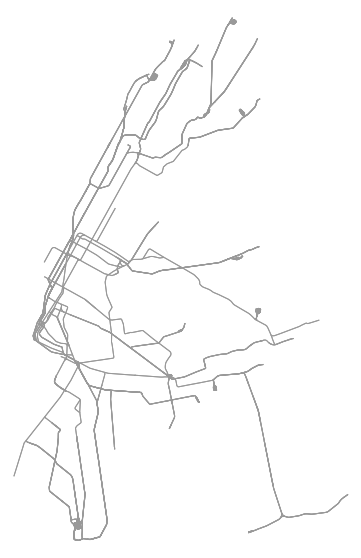

In [38]:
# get rail network
# note this is rail *infrastructure* and thus includes crossovers, sidings, spurs, yards, etc
# for station-based rail network, you should prob download a station adjacency matrix elsewhere
G = ox.graph_from_place('New York City, New York',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        network_type='none', infrastructure='way["railway"~"subway"]')

fig, ax = ox.plot_graph(G, fig_height=10, node_size=0)